Manual Slope (m): 0.18508466614655544
Manual Intercept (c): -2.246938231312333e-16


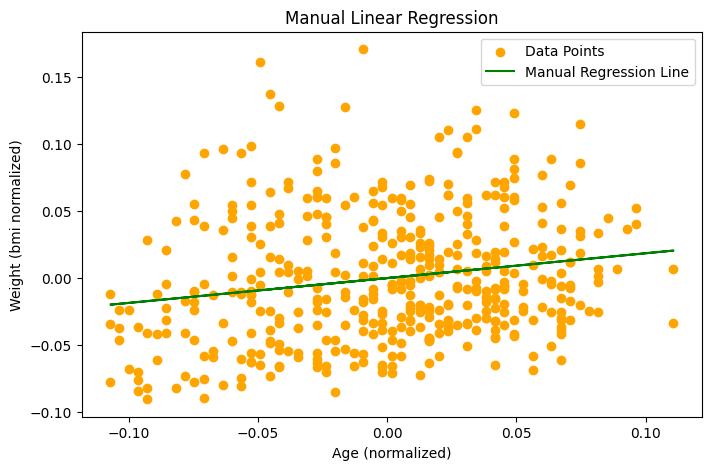

Sklearn Coeff: 0.18508466614655525
Sklearn Intercept: -2.2450993184548165e-16


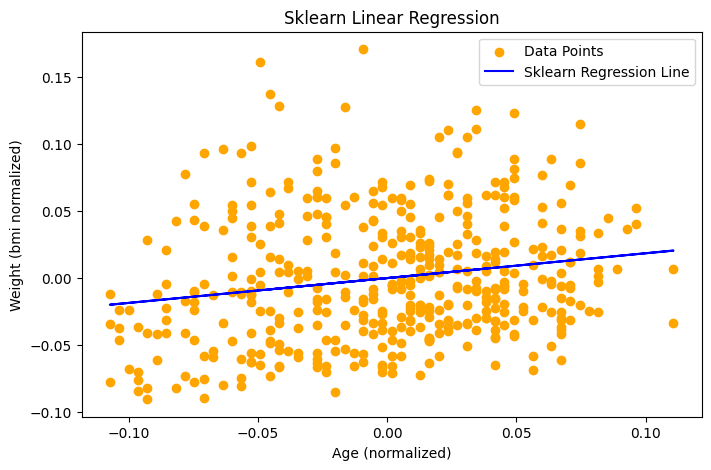

,Coefficient
0,0.185085


In [3]:
# ---------------------------------------------------------------
# IMPORTS
# ---------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn import linear_model


# ---------------------------------------------------------------
# LOAD BUILT-IN DATASET INSTEAD OF CSV
# ---------------------------------------------------------------
# Original line (commented):
# data = pd.read_csv("age data.csv")

# Load diabetes dataset (contains 'age' and 'bmi')
dataset = load_diabetes()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Use age (feature) as X and BMI (as weight substitute)
data = data[["age", "bmi"]]
data.columns = ["Age", "Weight"]


# ---------------------------------------------------------------
# MANUAL LINEAR REGRESSION CALCULATION
# ---------------------------------------------------------------
X = data["Age"]
y = data["Weight"]

n = len(data)
x_bar = sum(X)/n
y_bar = sum(y)/n

a = []
b = []

# Compute (xi - x̄) and (yi - ȳ)
for i in X:
    a.append(i - x_bar)

for j in y:
    b.append(j - y_bar)

# Multiply lists element-wise
def multiply_list(l1, l2):
    return [l1[i] * l2[i] for i in range(len(l1))]

# Square list elements
def square_list(l):
    return [v*v for v in l]

a_square = square_list(a)
amultiplyb = multiply_list(a, b)

# Manual slope & intercept
m_slope = sum(amultiplyb) / sum(a_square)
c_intercept = y_bar - (m_slope * x_bar)

print("Manual Slope (m):", m_slope)
print("Manual Intercept (c):", c_intercept)


# ---------------------------------------------------------------
# MANUAL PREDICTED VALUES
# ---------------------------------------------------------------
y_pred = [m_slope * i + c_intercept for i in X]


# ---------------------------------------------------------------
# PLOT MANUAL REGRESSION (CLEAN PLOT)
# ---------------------------------------------------------------
plt.figure(figsize=(8, 5))

plt.scatter(X, y, color='orange', label="Data Points")      # scatter only
plt.plot(X, y_pred, color='green', label="Manual Regression Line")

plt.xlabel("Age (normalized)")
plt.ylabel("Weight (bmi normalized)")
plt.title("Manual Linear Regression")
plt.legend()
plt.show()


# ---------------------------------------------------------------
# SKLEARN LINEAR REGRESSION
# ---------------------------------------------------------------
X_r = X.values.reshape(-1, 1)
y_r = y.values.reshape(-1, 1)

reg = linear_model.LinearRegression()
reg.fit(X_r, y_r)

print("Sklearn Coeff:", reg.coef_[0][0])
print("Sklearn Intercept:", reg.intercept_[0])

y_pred_2 = reg.predict(X_r)


# ---------------------------------------------------------------
# PLOT SKLEARN REGRESSION (CLEAN PLOT)
# ---------------------------------------------------------------
plt.figure(figsize=(8, 5))

plt.scatter(X_r, y_r, color='orange', label="Data Points")
plt.plot(X_r, y_pred_2, color='blue', label="Sklearn Regression Line")

plt.xlabel("Age (normalized)")
plt.ylabel("Weight (bmi normalized)")
plt.title("Sklearn Linear Regression")
plt.legend()
plt.show()


# ---------------------------------------------------------------
# SHOW COEFFICIENT AS DATAFRAME
# ---------------------------------------------------------------
pd.DataFrame(reg.coef_, columns=["Coefficient"])
